In [1]:
import pandas as pd 
import numpy as np 
import pprint as pp

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Algunas configuraciones de los paquetes
sns.set(color_codes=True)

In [3]:
#Alojamientos turísticos
alojamientos=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\alojamientos-turisticos-sample(ene2017)\alojamientos-turisticos-sample.csv",sep=",")
aloha=alojamientos.copy()
alojamientos.iloc[0:2,:]

,apartment_id,url,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,26316169,https://www.airbnb.com/rooms/26316169,Olivia's Place,Olivia`s place es Piso reformado a nuevo pensa...,123008256,"Barrio tranquilo, hay un chino al lado que ven...",Este,NaN,36.72462,-4.35947,...,10.0,10.0,8.0,9.0,Exempt,True,0.55,spain,malaga,2020-02-29
1,34672572,https://www.airbnb.com/rooms/34672572,1Bedroom apartment in Atocha - Wanda Metropoli...,Acogedor apartamento de 1 dormitorio y 1 baño ...,3256859,Este acogedor y amplio apartamento de dos dorm...,Cortes,Centro,40.41185,-3.69767,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-10-16


In [4]:
print('=====================================================================================================================')
print('ALOJAMIENTO TURÍSTICOS')
print("La forma que tiene el set de alojamiento turísticos es de :",aloha.shape) #Forma del dataset
print("El numero de filas que tienes es", aloha.shape[0])  # 
print("El numero de columnas que tienes es", aloha.shape[1]) #tot_pobl_fil=len(alojamientos) tambien cuenta las filas del df
print('=====================================================================================================================\n')
print("Los INDICES de FILA son:",aloha.index)  #Así se muestran los valores de indices de fila,  si no fuesen numericos te muestra el array
print("\nEl nombre del INDICES de las COLUMNAS son lo siguientes:\n\n",aloha.columns) #Así se muestran los valores de indices de columna

ALOJAMIENTO TURÍSTICOS
La forma que tiene el set de alojamiento turísticos es de : (10000, 40)
El numero de filas que tienes es 10000
El numero de columnas que tienes es 40

Los INDICES de FILA son: RangeIndex(start=0, stop=10000, step=1)

El nombre del INDICES de las COLUMNAS son lo siguientes:

 Index(['apartment_id', 'url', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', '

In [5]:
#Hay mucha informacion que no útil. La elimino para que no estorbe

In [6]:
shelter=aloha.drop(columns=['apartment_id', 'url', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list','has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication',
        'license', 'is_instant_bookable','reviews_per_month'])
shelter.head()


,accommodates,price,minimum_nights,maximum_nights,review_scores_location,review_scores_value,country,city,insert_date
0,5,80.0,2,30,8.0,9.0,spain,malaga,2020-02-29
1,4,500.0,1,1125,NaN,NaN,spain,madrid,2019-10-16
2,2,60.0,2,15,9.0,9.0,spain,mallorca,2020-04-23
3,2,48.0,1,12,9.0,9.0,spain,barcelona,2018-10-10
4,3,99.0,6,31,NaN,NaN,spain,girona,2019-08-31


In [7]:
shelter.describe()

,accommodates,price,minimum_nights,maximum_nights,review_scores_location,review_scores_value
count,10000.000000,10000.000000,10000.000000,1.000000e+04,7208.000000,7208.000000
mean,4.256400,129.477599,5.066800,2.155342e+05,9.522475,9.096698
std,2.609548,290.309118,20.121188,2.147483e+07,0.839760,1.062211
min,1.000000,9.000000,1.000000,1.000000e+00,2.000000,2.000000
25%,2.000000,45.000000,1.000000,9.000000e+01,9.000000,9.000000
50%,4.000000,76.000000,2.000000,1.125000e+03,10.000000,9.000000
75%,6.000000,130.000000,4.000000,1.125000e+03,10.000000,10.000000
max,27.000000,9949.000000,1000.000000,2.147484e+09,10.000000,10.000000


In [8]:
print('=====================================================================================================================')
print('ALOJAMIENTO TURÍSTICOS LIMPIO')
print("La forma que tiene el set es de:",aloha.shape) #Forma del dataset
print("El numero de filas que tienes es", aloha.shape[0])  # 
print("El numero de columnas que tienes es", aloha.shape[1]) #tot_pobl_fil=len(alojamientos) tambien cuenta las filas del df
print('=====================================================================================================================\n')
print("Los indices de columna son:",aloha.index)  #Así se muestran los valores de indices de fila,  si no fuesen numericos te muestra el array
print("\nEl nombre de las columas son lo siguientes:\n\n",aloha.columns) #Así se muestran los valores de indices de columna

ALOJAMIENTO TURÍSTICOS LIMPIO
La forma que tiene el set es de: (10000, 40)
El numero de filas que tienes es 10000
El numero de columnas que tienes es 40

Los indices de columna son: RangeIndex(start=0, stop=10000, step=1)

El nombre de las columas son lo siguientes:

 Index(['apartment_id', 'url', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'is_instant_bookable

In [9]:
# Que % de DATOS informados en estas columnas CONTIENEN INFORMACION (SON DISTINTOS de 0, vacío o NaN)?
# [Esto lo hago para saber si voy a tener suficientes datos como para sacar conclusiones interesantes]

lista=[]
for i in shelter.columns:
    lista.append(1-np.sum(shelter[i].isnull())/len(shelter))

#pp.pprint(list) Esta es la cantidad de datos con informacion en esta columna
    
col_masutiles=pd.DataFrame(data=lista,index=shelter.columns) #df columna desordenado y nombre col automático
col_masutiles=col_masutiles.rename(columns={0:'mas_info'})   #Renombramos columna 
col_masutiles=col_masutiles.sort_values(by='mas_info',axis=0,ascending=False )  #Ordenamos columna 
#print(col_masutiles)
col_masutiles

#CONCLUSION:PRACTICAMENTE EL 100% DE LOS DATOS DE ESPECIAL INTERES ESTAN INFORMADOS, Y EN LAS COLUMNAS EN LAS QUE FALTAN MÁS ESTAN INFORMADOS UN 72% DE DATOS 

,mas_info
accommodates,1.0000
price,1.0000
minimum_nights,1.0000
maximum_nights,1.0000
country,1.0000
city,1.0000
insert_date,1.0000
review_scores_location,0.7208
review_scores_value,0.7208


In [10]:
shelter.groupby(by='city')

In [42]:
precio_ciudad_dia=shelter.groupby(by='city').price.describe().sort_values(by='50%',ascending=True) 
#Agrupo los datos por ciudad/provincia y le pido que me describa el comportamiento de sus precios, y luego me los ordene por su mediana 
#Esto nos indicará lo que piden habitualmente por dia en cada una de las ciudades de forma anual 
print(precio_ciudad_dia)
precio_ciudad_dia
##¿¿COMO EXTRAIGO ESTA TABLA PARA MI MEMORIA??!!!!!!!!!!!!!!!!***************************************************************************************************************************************************

            count        mean         std   min   25%    50%    75%     max
city                                                                       
valencia    540.0   75.150778  138.528640  10.0  35.0   58.0   80.0  2000.0
barcelona  2806.0  118.276700  365.129814   9.0  36.0   60.0  107.0  6000.0
madrid     2229.0  106.896882  284.868268   9.0  36.0   60.0   99.0  8637.0
malaga      526.0   83.946768  103.152670  10.0  45.0   65.0   90.0  1800.0
sevilla     487.0  102.882957  133.886094  10.0  48.0   69.0  100.0  1787.0
girona     1560.0  135.464103  170.716165   9.0  65.0   93.5  150.0  3564.0
menorca     235.0  182.889362  210.316501  10.0  75.0  120.0  220.0  2100.0
mallorca   1617.0  207.466914  345.085083   9.0  95.0  147.0  235.0  9949.0


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
valencia,540.0,75.150778,138.528640,10.0,35.0,58.0,80.0,2000.0
barcelona,2806.0,118.276700,365.129814,9.0,36.0,60.0,107.0,6000.0
madrid,2229.0,106.896882,284.868268,9.0,36.0,60.0,99.0,8637.0
malaga,526.0,83.946768,103.152670,10.0,45.0,65.0,90.0,1800.0
sevilla,487.0,102.882957,133.886094,10.0,48.0,69.0,100.0,1787.0
girona,1560.0,135.464103,170.716165,9.0,65.0,93.5,150.0,3564.0
menorca,235.0,182.889362,210.316501,10.0,75.0,120.0,220.0,2100.0
mallorca,1617.0,207.466914,345.085083,9.0,95.0,147.0,235.0,9949.0


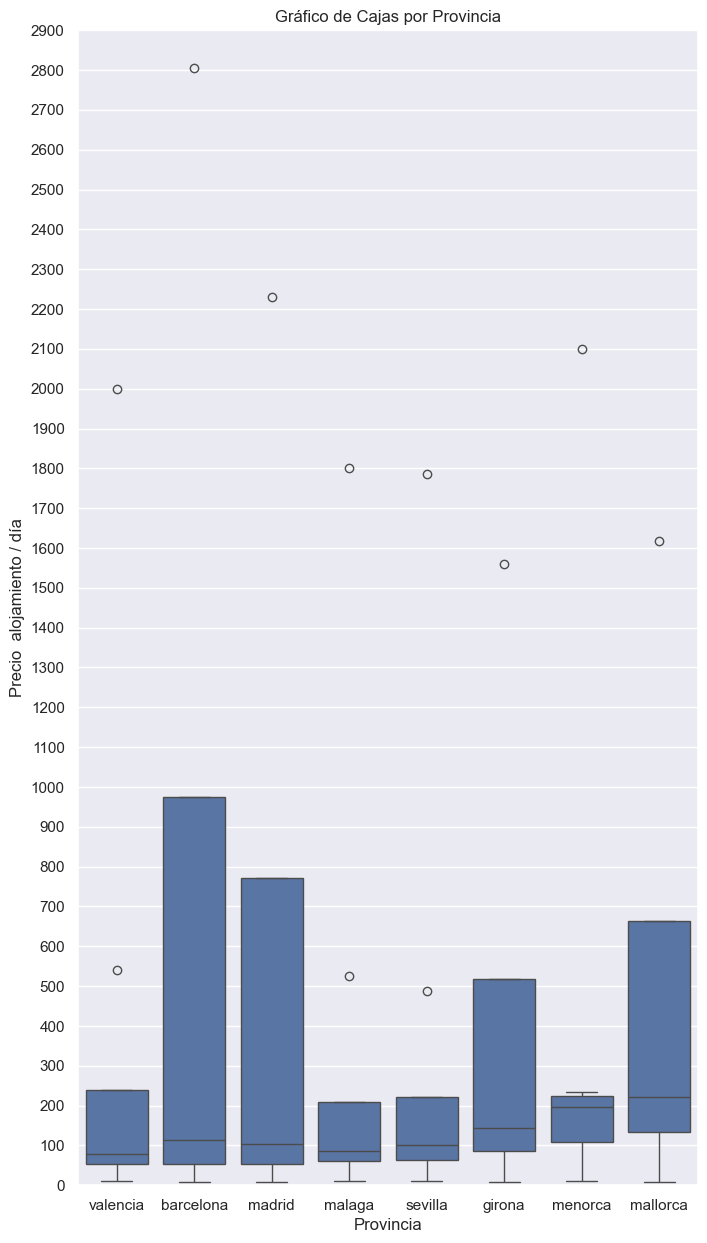

In [12]:
plt.figure(figsize=(8,15))
seq=list(range(0,8))

for i in seq:
    sns.boxplot(data=[precio_ciudad_dia.iloc[i]])#,precio_ciudad_dia.iloc[1],precio_ciudad_dia.iloc[2],precio_ciudad_dia.iloc[3],precio_ciudad_dia.iloc[4]])
plt.ylim(0, 2900) 
plt.xlabel('Provincia')
plt.ylabel('Precio  alojamiento / día')
plt.title('Gráfico de Cajas por Provincia')
#plt.yticks(range(y_min, y_max + y_step, y_step))  # Escalado del eje y con incremento de 100
plt.yticks(range(0, 3000, 100)); # Escalado del eje y con incremento de 100
plt.show();


In [72]:
from pprint import pprint

# Convertir la columna 'fecha_registro' a tipo de dato datetime
shelter['insert_date'] = pd.to_datetime(shelter['insert_date'])
precios_por_fecha = shelter.groupby(by='insert_date')['price'].mean() #Todos los precios por fecha 
precios_por_ciudad_y_mes = shelter.groupby(['city', shelter['insert_date'].dt.month])['price'].mean()

#print(precios_por_ciudad_y_mes) #Precios medios dia/ciudad

#pd.set_option('display.max_rows', None)  # Mostrar todas las filas
#pd.set_option('display.max_columns', None) 

precio_habitual_mes_prov=shelter.groupby([shelter['insert_date'].dt.month,'city'])['price'].median()#.sort_values(by='price',ascending=True)
precio_habitual_mes_prov

tabla1=precio_habitual_mes_prov.copy()
rob=tabla1.unstack()

#Restaurar opciones de visualización predeterminadas 
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns',None)
pd.set_option('display.max_columns',None)
pd.options.display.max_columns=None
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
rob['Mes']=meses
rob=rob.set_index('Mes')
rob['Max']=rob.max(axis=1) #Enriquecemos la tabla añadiendo  valores máximos y mínimos
rob['Min']=rob.min(axis=1)
rob
#rob['insert_date']=rob['insert_date'].replace({'1':'Enero','2':'Febrero','3':'Marzo','4':'Abril','5':'Mayo','6':'Junio','7':'Julio','8':'Agosto','9':'Septiembre','10':'Octubre','11':'Noviembre','12':'Diciembre'})
#¿¿¿!!!COMO PUEDO ARREGLAR ESTA TABLA PARA MI PRESENTACION????!!!!!!!!!!!!*************************************************************************************************************************************

city,barcelona,girona,madrid,malaga,mallorca,menorca,sevilla,valencia,Max,Min
Mes,,,,,,,,,,
Enero,60.0,107.0,60.0,60.0,147.0,100.0,63.0,49.0,147.0,49.0
Febrero,65.0,95.5,56.0,60.0,140.0,120.0,66.0,57.0,140.0,56.0
Marzo,70.0,96.5,60.0,62.0,122.0,158.0,67.0,60.0,158.0,60.0
Abril,60.0,90.0,60.0,60.0,148.0,90.0,75.0,65.0,148.0,60.0
Mayo,73.5,80.0,61.0,70.0,138.0,90.0,74.0,65.0,138.0,61.0
Junio,56.0,86.0,65.0,60.0,139.0,185.0,73.5,59.5,185.0,56.0
Julio,60.0,95.0,65.0,70.0,154.0,154.0,60.0,49.0,154.0,49.0
Agosto,58.0,95.0,60.0,60.0,175.5,75.0,70.0,51.5,175.5,51.5
Septiembre,57.0,88.5,67.5,69.0,151.0,100.0,64.0,60.0,151.0,57.0


In [ ]:
#tabla1.columns=['Mes','Ciudad','Precio']
#tabla1.index=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
#No se como  modificar los índices de fila y de columna

In [ ]:
## AHORA VEAMOS SI PODEMOS COMBINAR ESTA TABLA DE CIUDADES Y PRECIO DE ALOJAMIENTO TURÍSTICO CON EL RANKING DE MEJORES CIUDADES DEL MUNDO DONDE VIVIR 
## Y EXTRAER SI EXISTE ALGUNA CORRELACIÓN FUERTE ENTRE LOS FACTORES RELEVANTES DE ESA TABLA QUE YO HAYA DETERMINADO 
